In [23]:
import json
import requests
from config import api_key
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#bbox bounding box [lon-left,lat-bottom,lon-right,lat-top,zoom]
#The Bound-Boxing function allows you to select by specifying a box from 
#left bottom (lng-lat pair) to right top(another lng-lat pair).
#The fifth number is a zooming parameter to decide what the density of selections 
#(which effects how many cities) you want.
#
#To get all the cities in the planet, image a map with 0 longitude and 0 latitude at the center.
#The left bottom coordinate pair of that rectangle is (-180,-90) and the right top 
#coordinate is (180,90), thought I just used (179,89).
url_box = "http://api.openweathermap.org/data/2.5/box/city?"+"bbox=-180,-90,179,89,10"+"&appid="+api_key+"&units=imperial"
print(url_box)
box_test = requests.get(url_box)
only500cities = random.sample(box_test.json()['list'],500)

http://api.openweathermap.org/data/2.5/box/city?bbox=-180,-90,179,89,10&appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial


In [4]:
ids = [cities['id'] for cities in only500cities]
cities = [cities['name'] for cities in only500cities]
latitudes = [cities['coord']['Lat'] for cities in only500cities]
longitude =[cities['coord']['Lon'] for cities in only500cities]
temperature = [cities['main']['temp'] for cities in only500cities]
humidity = [cities['main']['humidity'] for cities in only500cities]
clouds = [cities['clouds']['today'] for cities in only500cities]
windspeed = [cities['wind']['speed'] for cities in only500cities]

In [5]:
df = pd.DataFrame({"ids":ids,"city":cities,
                   "Latitude":latitudes,"Longitude":longitude,
                   "Temperature":temperature,
                   "Humidity":humidity,"Clouds":clouds,
                  "WindSpeed":windspeed})
df.head()

,Clouds,Humidity,Latitude,Longitude,Temperature,WindSpeed,city,ids
0,80,43,26.333330,77.816673,79.47,2.01,Jora,1268823
1,92,98,50.317230,29.056299,32.22,4.63,Korostyshiv,704885
2,92,100,30.733330,131.000000,62.64,11.46,Nishinoomote,1855203
3,1,57,40.489792,-81.445671,22.53,3.10,New Philadelphia,5164390
4,75,74,53.333328,8.483330,33.80,8.20,Brake (Unterweser),2945545


In [30]:
sns.set()
sns.set_context("poster")

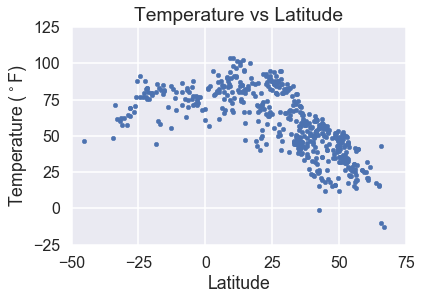

In [56]:
plt.scatter(df.Latitude,df.Temperature,s=20)
plt.ylim(-25,125)
plt.xlim(-50,75)
plt.xlabel("Latitude")
plt.ylabel("Temperature ($^\circ$F)")
plt.title("Temperature vs Latitude")
plt.show()

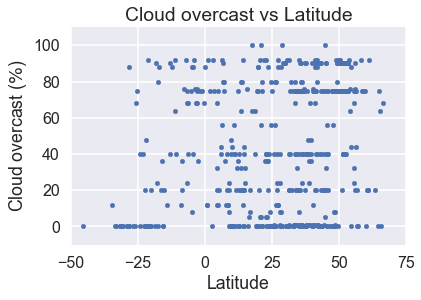

In [59]:
plt.scatter(df.Latitude,df.Clouds,s=20)
plt.xlim(-50,75)
plt.ylim(-10,110)
plt.xlabel("Latitude")
plt.ylabel("Cloud overcast ($\%$)")
plt.title("Cloud overcast vs Latitude")
plt.show()

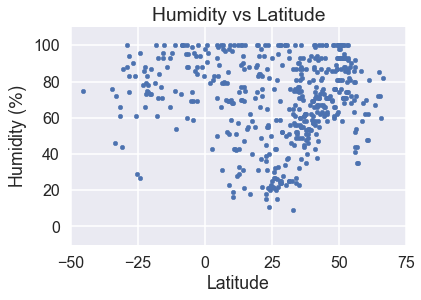

In [60]:
plt.scatter(df.Latitude,df.Humidity,s=20)
plt.xlim(-50,75)
plt.ylim(-10,110)
plt.xlabel("Latitude")
plt.ylabel("Humidity ($\%$)")
plt.title("Humidity vs Latitude")
plt.show()

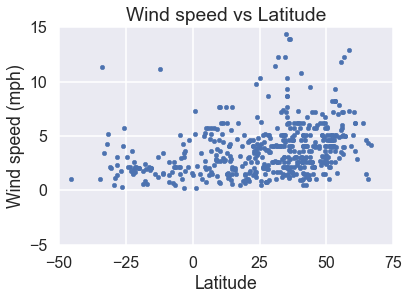

In [62]:
plt.scatter(df.Latitude,df.WindSpeed,s=20)
plt.xlim(-50,75)
plt.ylim(-5,15)
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.title("Wind speed vs Latitude")
plt.show()

## Try with citipy

In [10]:
from citipy import citipy

In [72]:
#For this exercise, we need an evenly spaced grid. 
#We can then pass these coordinates to citipy and get an close city

long_range = np.linspace(-180,179,100)
lat_range = np.linspace(-90,89,100)

In [13]:
#api.openweathermap.org/data/2.5/weather?q={city name},{country code}
#
obtained_city = []
url_list = []
json_response = []
i = 0
for lon in long_range:
    for lat in lat_range:
        city = citipy.nearest_city(lon,lat)
        #We want to test if the city has already been selected given 
        #the coordinates. If it has, pass the loop. If it has not, then 
        #build the url and attempt to get the json information.
        if ((city.city_name,city.country_code) in obtained_city):
            pass
        else:
            url = "http://api.openweathermap.org/data/2.5/weather?q={0},{1}&appid={2}&units=imperial".format(city.city_name,city.country_code,api_key)
            obtained_city.append((city.city_name,city.country_code))
            response = requests.get(url)
            #We now need to see if the request was able to get data for the city provided.
            #If it was not able to get a city, then we need to check and avoid appending it 
            #to the list of cities.
            if 'name' in response.json().keys():
                json_response.append(response.json())
                i=i+1
                if (i % 100 == 0):
                    print(i)
            else:
                    pass
            url_list.append(url)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [88]:
#Once we have the cities, we can randomly downselect to 1000 cities
json_1000 = random.sample(json_response,1000)

In [89]:
data = [[city['id'],city['name'],
         city['coord']['lat'],city['coord']['lon'],
         city['main']['temp'],city['main']['humidity'],
         city['clouds']['all'],city['wind']['speed']] for city in json_1000]

In [90]:
df2 = pd.DataFrame(data)

In [91]:
df2.columns = ['id','city','lat','lon','temperature','humidity','clouds','windspeed']

In [92]:
df2.head()

,id,city,lat,lon,temperature,humidity,clouds,windspeed
0,3374120,Vila do Maio,15.13,-23.22,77.00,57,20,27.51
1,1037125,Montepuez,-13.13,39.00,83.38,95,8,6.78
2,472278,Volsk,52.04,47.39,34.47,100,88,8.90
3,4632595,Jackson,35.61,-88.82,51.13,57,1,4.70
4,668628,Rosiile,44.87,23.93,57.20,54,0,5.82


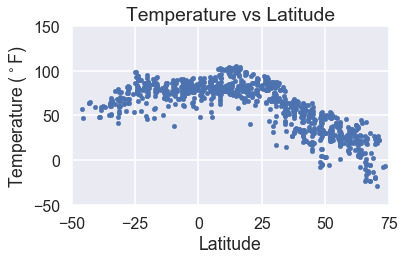

In [110]:
plt.scatter(df2.lat, df2.temperature,s=20)
plt.ylim(-50,150)
plt.xlim(-50,75)
plt.xlabel("Latitude")
plt.ylabel("Temperature ($^\circ$F)")
plt.title("Temperature vs Latitude")
plt.tight_layout()
plt.savefig("figures/Temperature.png",dpi=100)
plt.show()

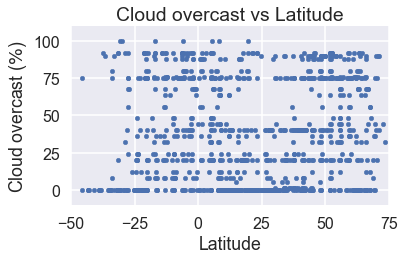

In [111]:
plt.scatter(df2.lat, df2.clouds,s=20)
plt.xlim(-50,75)
plt.ylim(-10,110)
plt.xlabel("Latitude")
plt.ylabel("Cloud overcast ($\%$)")
plt.title("Cloud overcast vs Latitude")
plt.tight_layout()
plt.savefig("figures/Clouds.png",dpi=100)
plt.show()

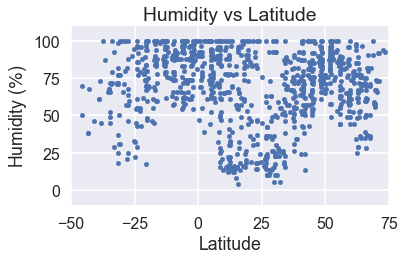

In [112]:
plt.scatter(df2.lat, df2.humidity,s=20)
plt.xlim(-50,75)
plt.ylim(-10,110)
plt.xlabel("Latitude")
plt.ylabel("Humidity ($\%$)")
plt.title("Humidity vs Latitude")
plt.tight_layout()
plt.savefig("figures/Humidity.png",dpi=100)
plt.show()

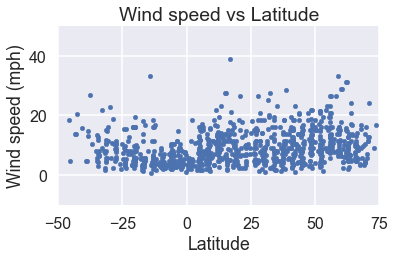

In [113]:
plt.scatter(df2.lat, df2.windspeed,s=20)
plt.xlim(-50,75)
plt.ylim(-10,50)
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.title("Wind speed vs Latitude")
plt.tight_layout()
plt.savefig("figures/Windspeed.png",dpi=100)
plt.show()